# Visualize bare ground patches extracted from dem_mask.py output
* `baker_2015_utm_m_30m_ref.tif` using dem_mask.py nlcd and glacier filters = roughly the DEM pixels we want to keep for coregistration tasks

616 {'type': 'Feature', 'id': 'baker_2015_utm_m_30m_ref.tif:0', 'properties': {'val': 255.0, 'filename': 'baker_2015_utm_m_30m_ref.tif'}, 'bbox': [590032.9387119232, 5414242.066348841, 590062.9387119232, 5414272.066348841], 'geometry': {'type': 'Polygon', 'coordinates': [[(590032.9387119232, 5414272.066348841), (590032.9387119232, 5414242.066348841), (590062.9387119232, 5414242.066348841), (590062.9387119232, 5414272.066348841), (590032.9387119232, 5414272.066348841)]]}}
                                            geometry
0  POLYGON ((590032.939 5414272.066, 590032.939 5...
1  POLYGON ((590092.939 5414272.066, 590152.939 5...
2  POLYGON ((590152.939 5414062.066, 590182.939 5...
3  POLYGON ((590272.939 5413762.066, 590272.939 5...
4  POLYGON ((590422.939 5413612.066, 590452.939 5...
                                            geometry
0  POLYGON ((590034.053 5414271.439, 590034.053 5...
1  POLYGON ((590094.053 5414271.439, 590154.053 5...
2  POLYGON ((590154.053 5414061.439, 590184.053

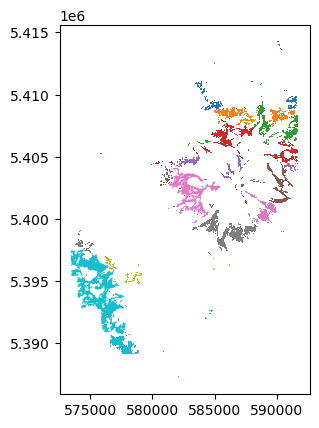

In [2]:
import rasterio
import rasterio.features

import pathlib

import json

import os

import shapely.geometry
import time

import subprocess

import shapely

import geopandas as gpd
import matplotlib.pyplot as plt


out_crs = "EPSG:32610"

with rasterio.open("baker_2015_utm_m_30m_ref.tif") as mask_src:
    # mask_ds = mask_file.read()
    polygons = list(
        rasterio.features.dataset_features(
            mask_src, band=False, as_mask=True, geographic=False
        )
    )
    print(len(polygons), polygons[0])
gdf_32610 = gpd.GeoDataFrame(
    geometry=[shapely.geometry.shape(p["geometry"]) for p in polygons], crs="EPSG:32610"
)
print(gdf_32610.head())
gdf = gdf_32610.to_crs("EPSG:3740")
print(gdf.head())
gdf["c"] = gdf.index

gdf.plot(column="c", cmap="tab10")
plt.savefig("test_fig_dem_mask_30m_epsg3740.png")
